In [1]:
### Please Fill the following entries
StudentName = "Mohammad Ali Etemadi Naeen"
StudentID   = "402200348"

print (f'StudentName:{StudentName} , StudentID:{StudentID}')

StudentName:Mohammad Ali Etemadi Naeen , StudentID:402200348


**Import Libraries**

In [2]:
import sklearn
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import IPython
import matplotlib

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from __future__ import print_function

---

# Answer 1)

### **Save the dataset from the Website into a CSV file**

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

dataset = pd.read_csv(url, delim_whitespace=True, header=None)

column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car Name"]

dataset.columns = column_names

dataset.to_csv("E:\Edu_Master_Sharif\Term 1\Statistical Learning\Hws\HW1_MohammadAliEtemadi_402200348\DataSet.csv", index=False)

### **Read Dataset**

In [4]:
df = pd.read_csv("E:\Edu_Master_Sharif\Term 1\Statistical Learning\Hws\HW1_MohammadAliEtemadi_402200348\DataSet.csv")
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [5]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
Car Name         object
dtype: object

### **Data Processing**

#### Change values "?" in Horsepower column

In [6]:
# Find the ? value
Horsepower_column = df.loc[:,'Horsepower']
unusual_value = Horsepower_column[Horsepower_column == "?"]
print('the values that are equal to "?" in Horsepower column:\n', unusual_value)

# Replace the ? value with 0 value
df.loc[:,"Horsepower"] = df.loc[:,"Horsepower"].replace("?", 0)


the values that are equal to "?" in Horsepower column:
 32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: Horsepower, dtype: object


In [7]:
# Change the type of Horsepower column from object to int
df.loc[:,"Horsepower"] = df.loc[:,"Horsepower"].astype(float)
df

<ipython-input-7-1176db0e1afc>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,"Horsepower"] = df.loc[:,"Horsepower"].astype(float)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [8]:
# calculate mean of Horsepower column
mean = df.loc[:,'Horsepower'].mean(axis=0)
print("mean value of Horsepower column: ", mean)

# Replace the 0 value with mean value of Horsepower column
df.loc[:,"Horsepower"] = df.loc[:,"Horsepower"].replace(0, mean)
a = df.loc[:,'Horsepower']
a[32]

mean value of Horsepower column:  102.89447236180905


102.89447236180905

#### Car column

In [9]:
# extract just the BRANDS of cars
df['CarBrand'] = df['Car Name'].str.split(' ').str[0]

# label one hot for cars brand
df = pd.get_dummies(df, columns=['CarBrand'], prefix=['Car'])
df = df.drop('Car Name', axis=1)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car_amc,Car_audi,...,Car_renault,Car_saab,Car_subaru,Car_toyota,Car_toyouta,Car_triumph,Car_vokswagen,Car_volkswagen,Car_volvo,Car_vw
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,0,0,...,0,0,0,0,0,0,0,0,0,1
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0


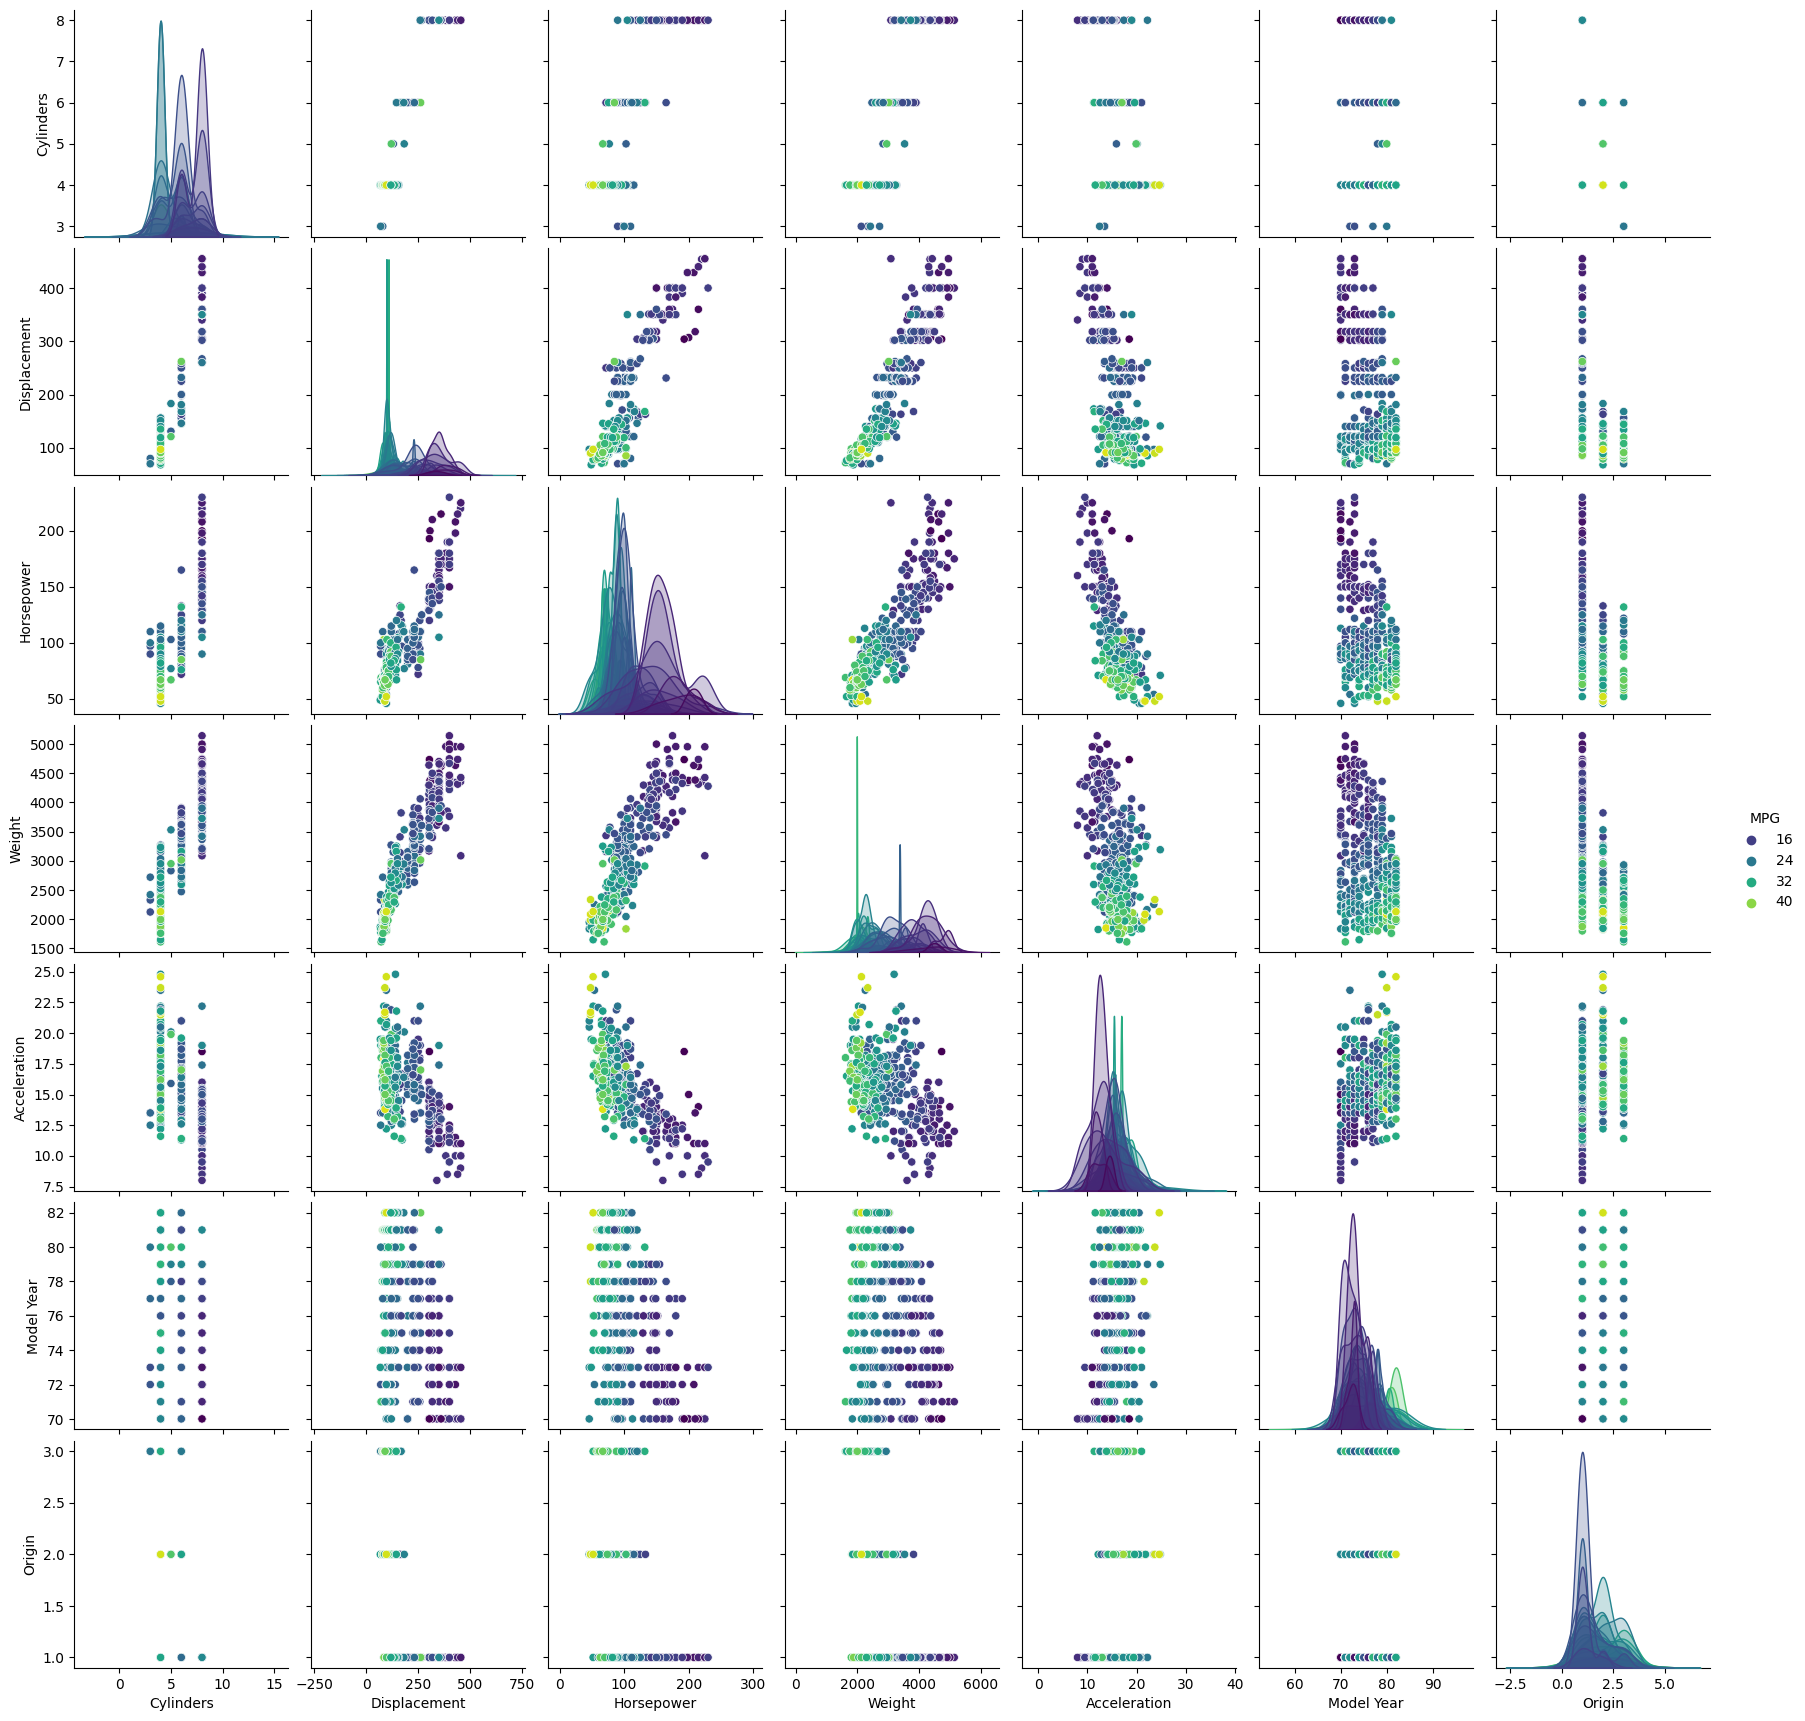

In [51]:
subset = df.iloc[:, 0:8]
sns.pairplot(data=subset, hue='MPG', palette="viridis")
plt.show()

---

# Answer 2)

In [10]:
features = df.iloc[:, 1:]
y_target = df['MPG']

Xtrain, Xtest, ytrain, ytest = train_test_split(features, y_target, test_size=0.2, random_state=42)

---

# Answer 3)

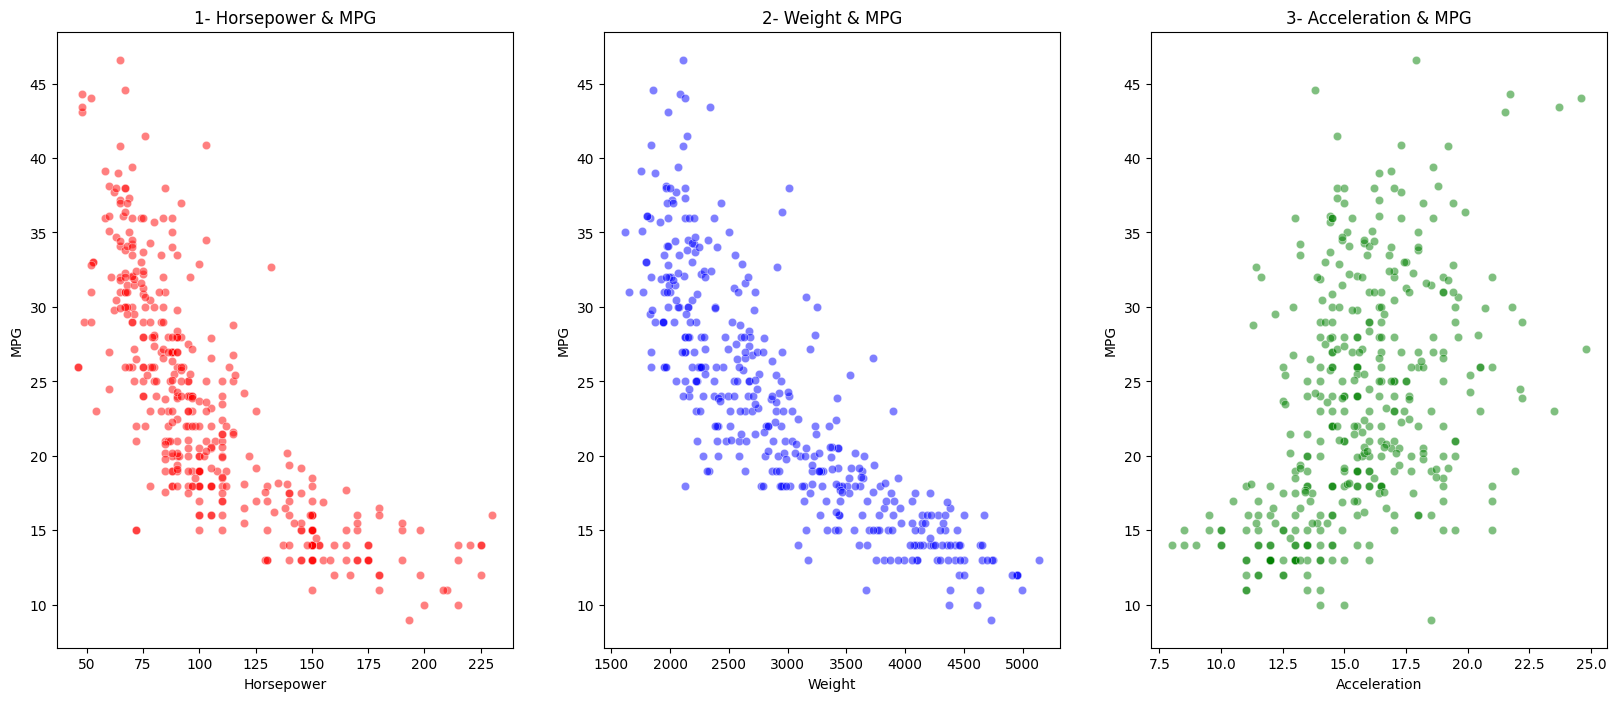

In [11]:
selected_features = df[['Horsepower', 'Weight', 'Acceleration']]
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.scatterplot(x=selected_features.iloc[:, 0], y=y_target, alpha=0.5, color='r')
plt.title("1- Horsepower & MPG")

plt.subplot(1,3,2)
sns.scatterplot(x=selected_features.iloc[:, 1], y=y_target, alpha=0.5, color='b')
plt.title("2- Weight & MPG")

plt.subplot(1,3,3)
sns.scatterplot(x=selected_features.iloc[:, 2], y=y_target, alpha=0.5, color='g')
plt.title("3- Acceleration & MPG")

plt.show()

As the figure shows, 3 features ('Horsepower', 'Weigtht' and 'acceleration') has been selected to plot and tell about MPG.

The y-axes shows the MPG and x-axes shows features.


*   in the first and second plot, it indicates that the selected features ('Horsepower', 'Weigtht') have a high correlation with MPG; but the correlation is high negative (if horsepower or weight increases the MPG reduces)
*   but the third plot, indicates that there is not a high and quite clear correlation between Accelaration and MPG. we can just understand that there is a bit positive correlation between them.






---

# Answer 4)

In [12]:
model = LinearRegression()
# model = make_pipeline(StandardScaler(), LinearRegression())
model

LinearRegression()

In [13]:
model.fit(features, y_target)

LinearRegression()

### Coefficients Vectorr

In [14]:
# calculating coefficients vector
coefficients = model.coef_
intercept = model.intercept_

print('coefficients:\n', coefficients)
print('\nintercept:\n', intercept)

coefficients:
 [-5.94702331e-01  2.43959703e-02 -2.52574226e-02 -6.47527219e-03
  9.24925878e-04  7.16803837e-01  1.08340940e+00 -2.38435184e+00
  7.30442114e-01 -1.31151789e+00 -9.24077376e-01  1.88731426e+00
 -7.24575153e-01 -1.59717097e+00 -9.30433144e-01 -3.48737936e-01
 -2.03295461e+00  1.30648875e+00 -1.43079776e-01  1.27868369e+00
 -1.50035754e+00  2.48837596e+00  6.54760488e-01 -4.37524860e+00
 -6.52032143e-01  1.80691935e+00  1.45792844e+00 -1.78757238e+00
  1.52723056e+00  3.43030677e-01 -1.24990550e+00  4.39665175e-01
  4.76741076e-01  6.55437769e-01  2.92931392e+00 -1.39554851e-01
 -1.04242744e+00 -1.02080313e+00 -1.83697008e+00  5.19649329e+00
 -4.09662095e+00 -3.21366891e-01 -1.72718447e+00  6.96811716e+00]

intercept:
 -11.908250836877109


In [15]:
# linear_regression_step = model.named_steps['linearregression']
# # Get the coefficients and intercept
# coefficients = linear_regression_step.coef_
# intercept = linear_regression_step.intercept_

# # underscore at the end indicates a fit parameter
# print('coefficients:\n', coefficients)
# print('\nintercept:\n', intercept)

### MSE

In [23]:
# Model Training
model.fit(Xtrain, ytrain)
# Predict
y_pred = model.predict(Xtest)
# calculate the MSE
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 9.889712963139818
R-squared: 0.8160616125343083


### Plotting

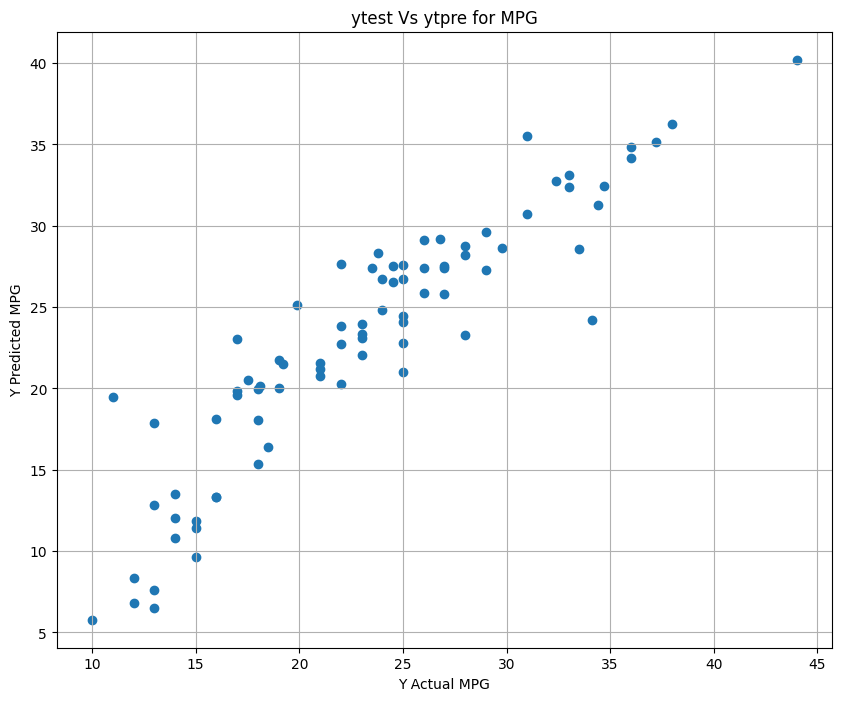

In [29]:
# plot the ytpre & yt
plt.figure(figsize=(10, 8))
plt.scatter(ytest, y_pred)
plt.title("ytest Vs ytpre for MPG")
plt.xlabel("Y Actual MPG")
plt.ylabel("Y Predicted MPG")
plt.grid()
plt.show()

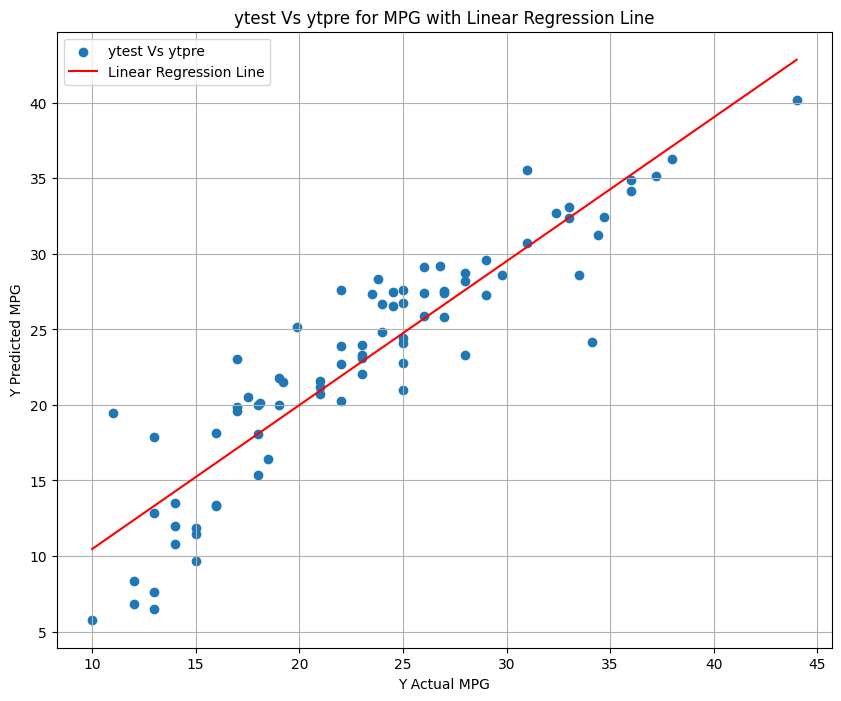

In [33]:
x_range = np.linspace(min(ytest), max(ytest), 100)
# a linear regression line
coefficients = np.polyfit(ytest, y_pred, 1)
linear_reg_line = np.poly1d(coefficients)
y_range = linear_reg_line(x_range)

# Create a scatter plot of the data points
plt.figure(figsize=(10, 8))
plt.scatter(ytest, y_pred, label='ytest Vs ytpre')
plt.plot(x_range, y_range, color='red', label='Linear Regression Line')

plt.title("ytest Vs ytpre for MPG with Linear Regression Line")
plt.xlabel("Y Actual MPG")
plt.ylabel("Y Predicted MPG")
plt.grid()
plt.legend()
plt.show()

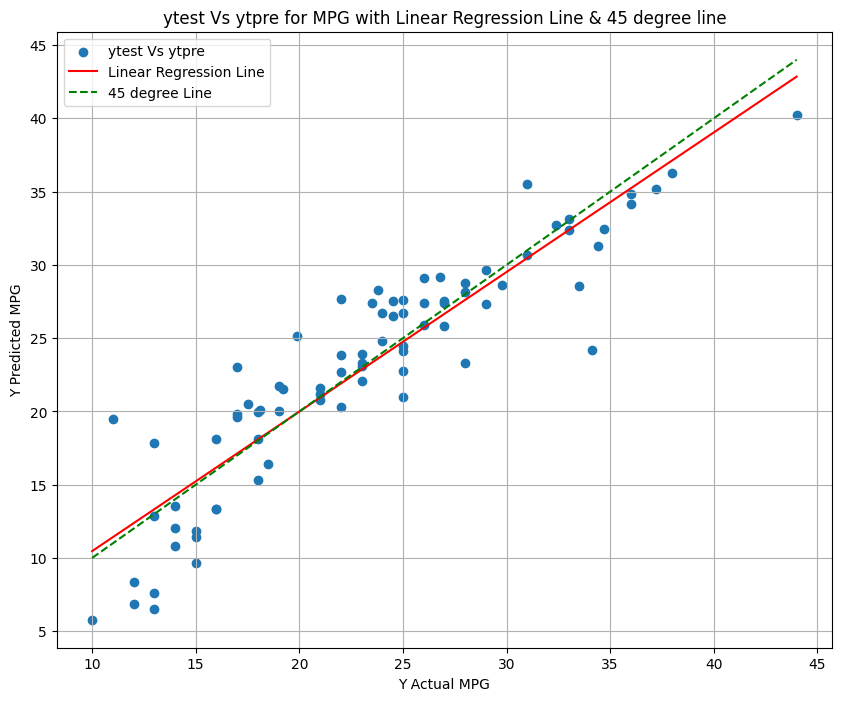

In [42]:
plt.figure(figsize=(10, 8))
plt.scatter(ytest, y_pred, label='ytest Vs ytpre')
plt.plot(x_range, y_range, color='red', label='Linear Regression Line')
plt.plot(x_range, x_range, color='green', linestyle='dashed', label='45 degree Line')

plt.title("ytest Vs ytpre for MPG with Linear Regression Line & 45 degree line")
plt.xlabel("Y Actual MPG")
plt.ylabel("Y Predicted MPG")
plt.grid()
plt.legend()
plt.show()

**As the figures show, the linear regression line that we fitted in our linear regression model has very little difference compared to the first-quadrant ruler line or 45 degree line (that represents the optimal condition), indicating that our modelworks well.**

---
# Answer 5)

### Calculating correlation and covariance matrix

In [21]:
corr_matrix = df.corr()
corr_matrix

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car_amc,Car_audi,...,Car_renault,Car_saab,Car_subaru,Car_toyota,Car_toyouta,Car_triumph,Car_vokswagen,Car_volkswagen,Car_volvo,Car_vw
MPG,1.000000,-0.775396,-0.804203,-0.771785,-0.831741,0.420289,0.579267,0.563450,-0.185651,0.054845,...,0.135325,0.004975,0.090488,0.161096,-0.003308,0.073844,0.040411,0.141770,-0.038004,0.245689
Cylinders,-0.775396,1.000000,0.950721,0.839340,0.896017,-0.505419,-0.348746,-0.562543,0.146118,-0.092074,...,-0.096588,-0.086282,-0.086282,-0.185119,-0.042977,-0.042977,-0.042977,-0.169466,-0.057393,-0.105942
Displacement,-0.804203,0.950721,1.000000,0.894020,0.932824,-0.543684,-0.370164,-0.609409,0.149917,-0.104803,...,-0.109640,-0.074187,-0.090635,-0.204116,-0.035387,-0.034423,-0.050327,-0.184130,-0.071193,-0.120099
Horsepower,-0.771785,0.839340,0.894020,1.000000,0.860908,-0.684646,-0.411981,-0.453477,0.070925,-0.062186,...,-0.062937,0.011368,-0.081727,-0.142541,-0.009795,-0.021634,-0.055837,-0.201500,-0.000905,-0.141426
Weight,-0.831741,0.896017,0.932824,0.860908,1.000000,-0.417457,-0.306564,-0.581024,0.100900,-0.065539,...,-0.119522,-0.041121,-0.098155,-0.204860,-0.027559,-0.027915,-0.066783,-0.217597,0.009105,-0.128396
Acceleration,0.420289,-0.505419,-0.543684,-0.684646,-0.417457,1.000000,0.288137,0.205873,-0.030344,0.018206,...,0.058642,-0.014381,0.049640,0.049998,-0.019463,-0.008530,-0.004885,0.101450,-0.000064,0.145924
Model Year,0.579267,-0.348746,-0.370164,-0.411981,-0.306564,0.288137,1.000000,0.180662,-0.128447,-0.010716,...,0.036345,-0.054842,0.054293,0.035749,-0.054498,0.054224,0.054224,-0.032692,-0.005920,0.116916
Origin,0.563450,-0.562543,-0.609409,-0.453477,-0.581024,0.205873,0.180662,1.000000,-0.196731,0.071346,...,0.060145,0.053727,0.179510,0.461236,0.089415,0.026762,0.026762,0.105525,0.065969,0.065969
Car_amc,-0.185651,0.146118,0.149917,0.070925,0.100900,-0.030344,-0.128447,-0.196731,1.000000,-0.036808,...,-0.031029,-0.027718,-0.027718,-0.071219,-0.013806,-0.013806,-0.013806,-0.054441,-0.034034,-0.034034
Car_audi,0.054845,-0.092074,-0.104803,-0.062186,-0.065539,0.018206,-0.010716,0.071346,-0.036808,1.000000,...,-0.015092,-0.013482,-0.013482,-0.034640,-0.006715,-0.006715,-0.006715,-0.026479,-0.016554,-0.016554


### plot it with seaborn and heatmap

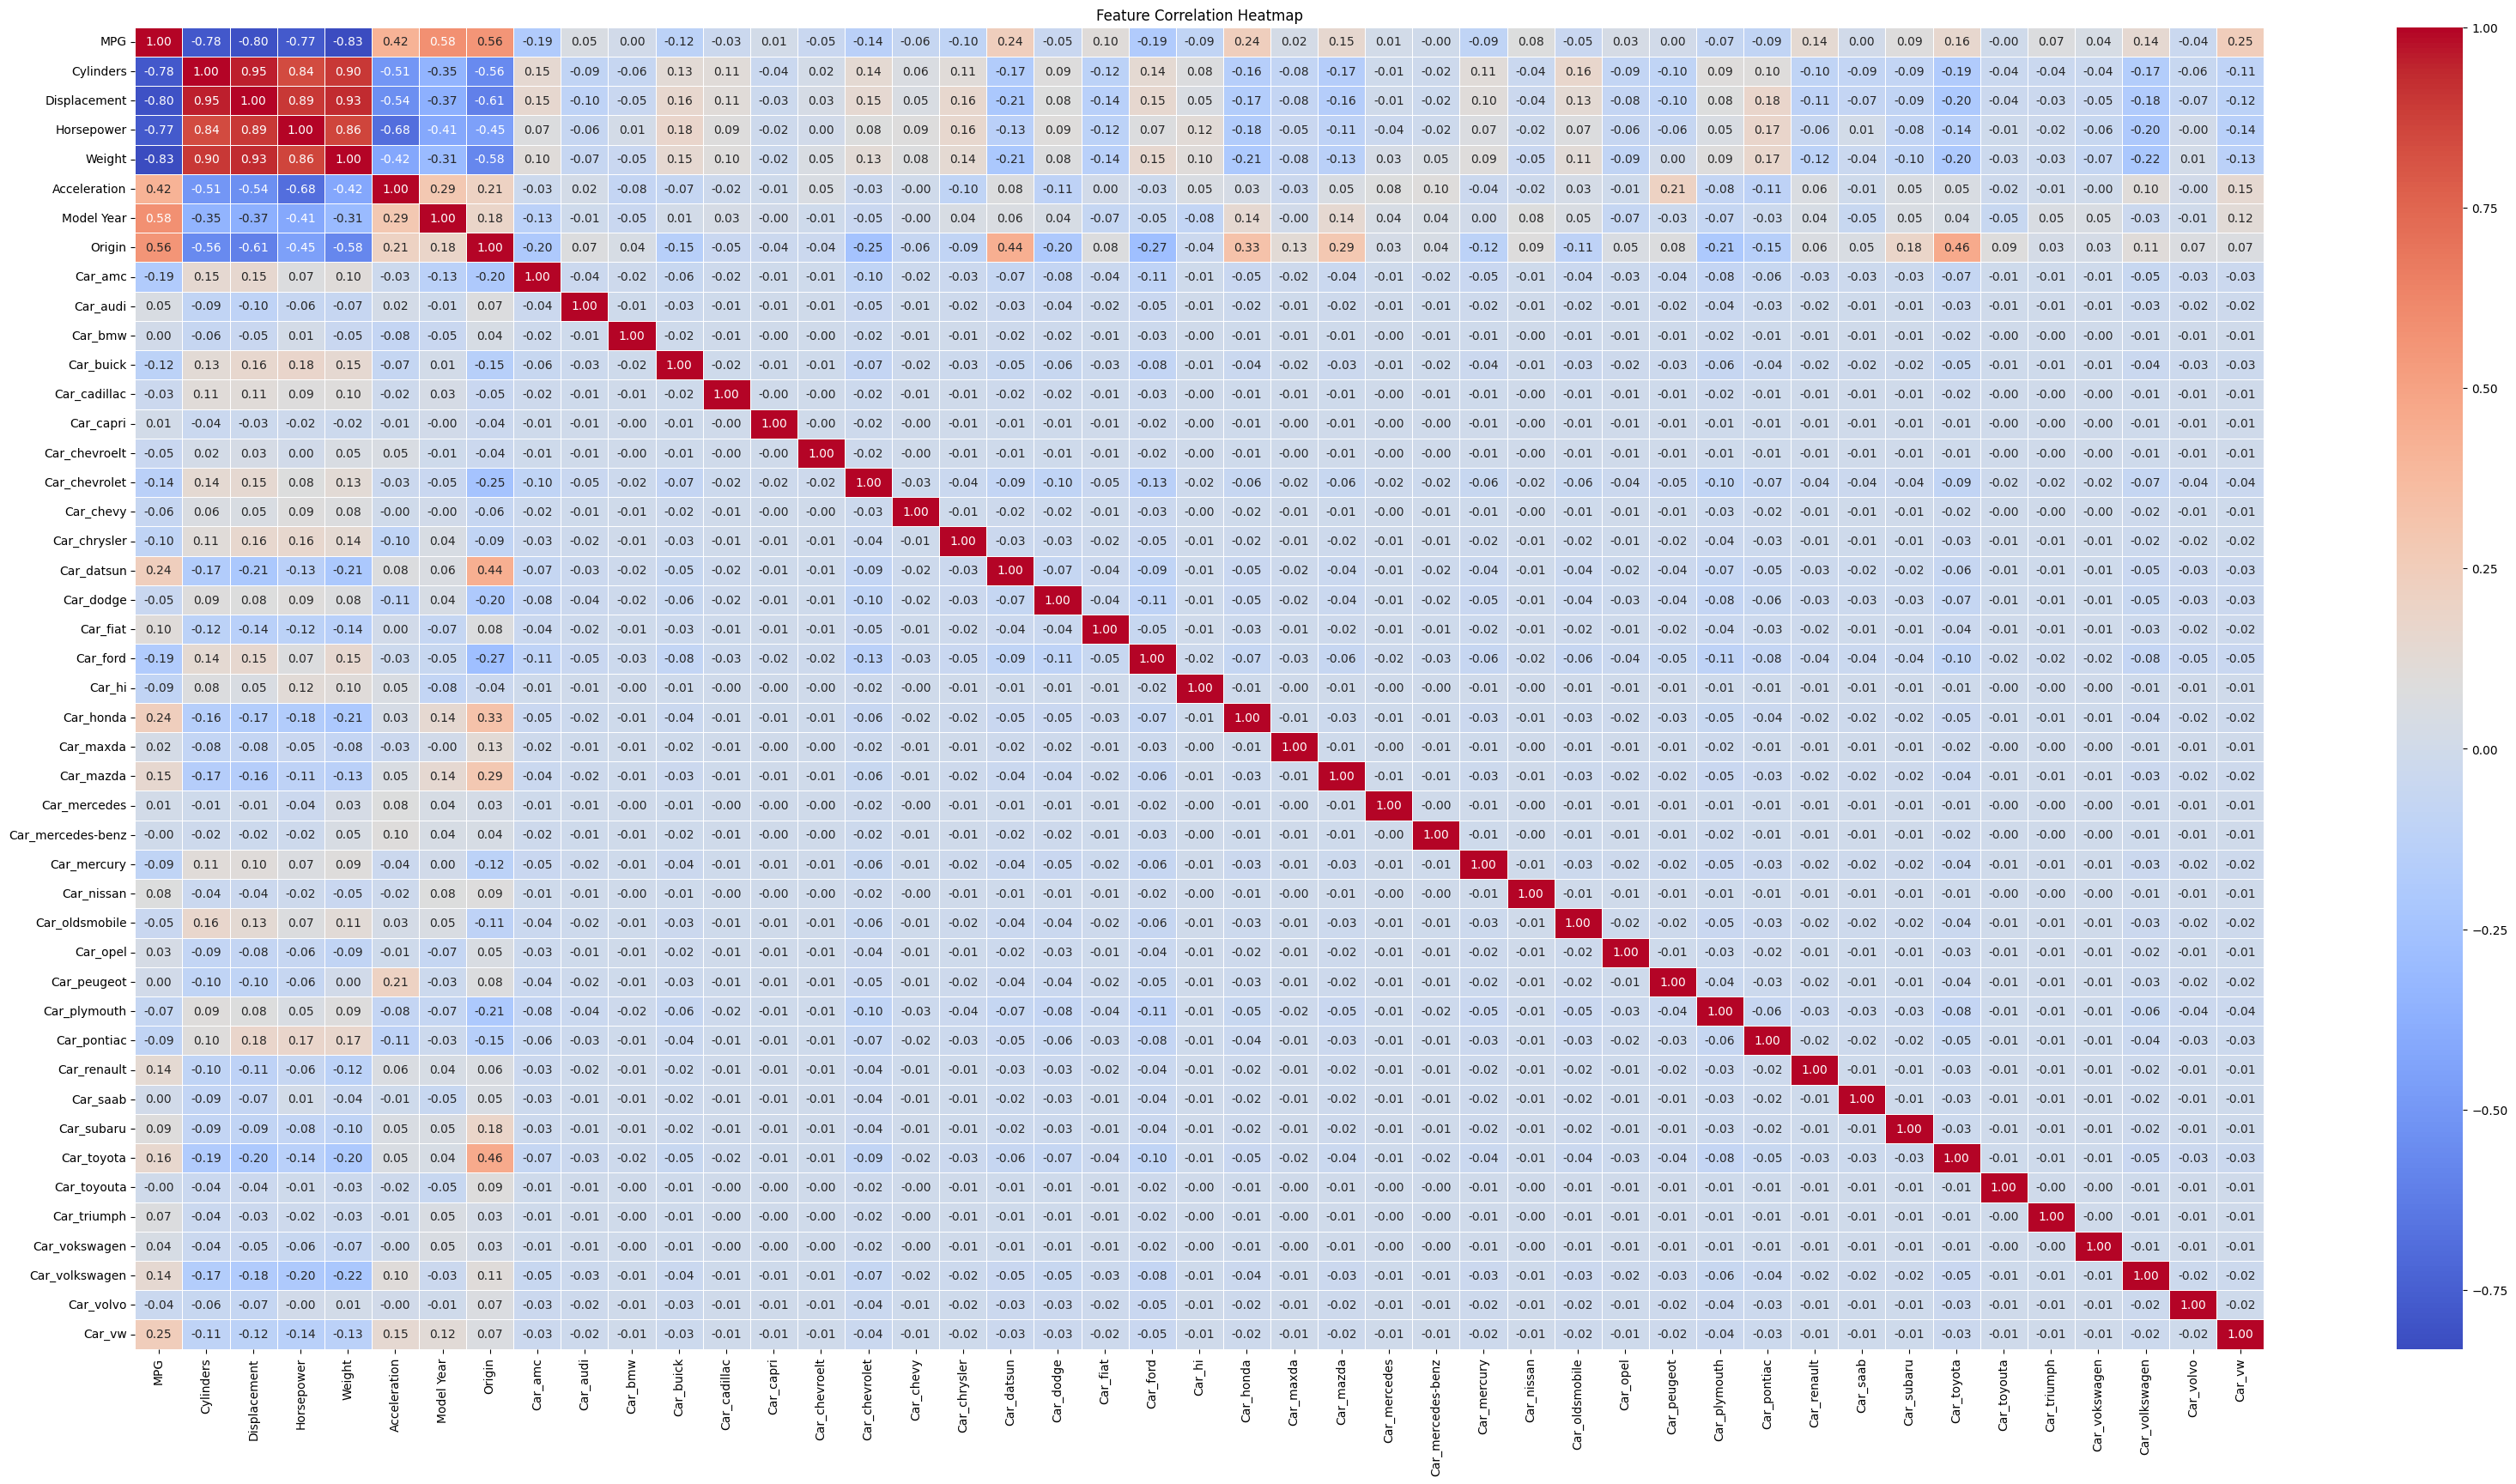

In [22]:
plt.figure(figsize=(40, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

As the figure shows, some of the features have high correlation with eachother.

for example:


*   'cylinders' and 'displacement' have a high positive correlation = 0.95.

*   or also 'weight' and 'displacement' = 0.93.

In consideration of the correlation between MPG and other features, it is evident that high correlation is a high negative correlation:

*   'MPG' and 'weight' = -0.83
*   'MPG' and 'displacement' = -0.8
*   'MPG' and 'cylinders' = -0.78







---


## Eliminate high correlated feature


As we saw, 'displacement' and 'cylindets' features were two of the feature that had a high correlation.
In this part, I eliminate them and calculate the Q4 and Q5 again.

#### eliminate two features

In [61]:
new_features = features.drop(['Cylinders', 'Displacement'], axis=1)
new_features

,Horsepower,Weight,Acceleration,Model Year,Origin,Car_amc,Car_audi,Car_bmw,Car_buick,Car_cadillac,...,Car_renault,Car_saab,Car_subaru,Car_toyota,Car_toyouta,Car_triumph,Car_vokswagen,Car_volkswagen,Car_volvo,Car_vw
0,130.0,3504.0,12.0,70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,165.0,3693.0,11.5,70,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,150.0,3436.0,11.0,70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,150.0,3433.0,12.0,70,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,140.0,3449.0,10.5,70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,86.0,2790.0,15.6,82,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,52.0,2130.0,24.6,82,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
395,84.0,2295.0,11.6,82,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,79.0,2625.0,18.6,82,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### new regression model

In [63]:
model = LinearRegression()
model.fit(new_features, y_target)

LinearRegression()

In [64]:
# calculating coefficients vector
coefficients = model.coef_
intercept = model.intercept_

print('coefficients:\n', coefficients)
print('\nintercept:\n', intercept)

coefficients:
 [-1.19166152e-02 -5.49736517e-03 -2.48800012e-02  6.91007185e-01
  8.78245455e-01 -2.02875829e+00  2.79228876e-01 -1.70645307e+00
 -6.09852604e-01  2.42055306e+00 -6.30027966e-01 -1.41052793e+00
 -6.90303123e-01 -7.21643219e-01 -1.22318496e+00  1.25284434e+00
 -1.63678327e-01  1.05251971e+00 -1.32844408e+00  6.83470043e-01
  1.07855785e+00 -4.39536710e+00 -5.87045061e-01  2.03580763e+00
  7.79777791e-01 -1.53284000e+00  2.14490510e+00  5.44932359e-01
 -1.19739773e+00 -3.14233973e-02  4.84160399e-01  1.19847242e+00
  2.75280835e+00 -7.27079052e-01 -7.52737504e-01 -9.34899220e-01
 -1.93568516e+00  5.28919709e+00 -3.81643309e+00 -1.71883514e-01
 -2.58241385e+00  7.18084323e+00]

intercept:
 -12.15849974191012


#### MSE of new model

In [65]:
Xtrain, Xtest, ytrain, ytest = train_test_split(new_features, y_target, test_size=0.2, random_state=42)

# Model Training
model.fit(Xtrain, ytrain)
# Predict
y_pred = model.predict(Xtest)
# calculate the MSE
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 10.713028767730318
R-squared: 0.8007487938472717


**In this new model with eliminated features,**

**the value of MSE has increased compared to previous MSE that we calculated, which is not suitable and desirable for us.**

#### plotting


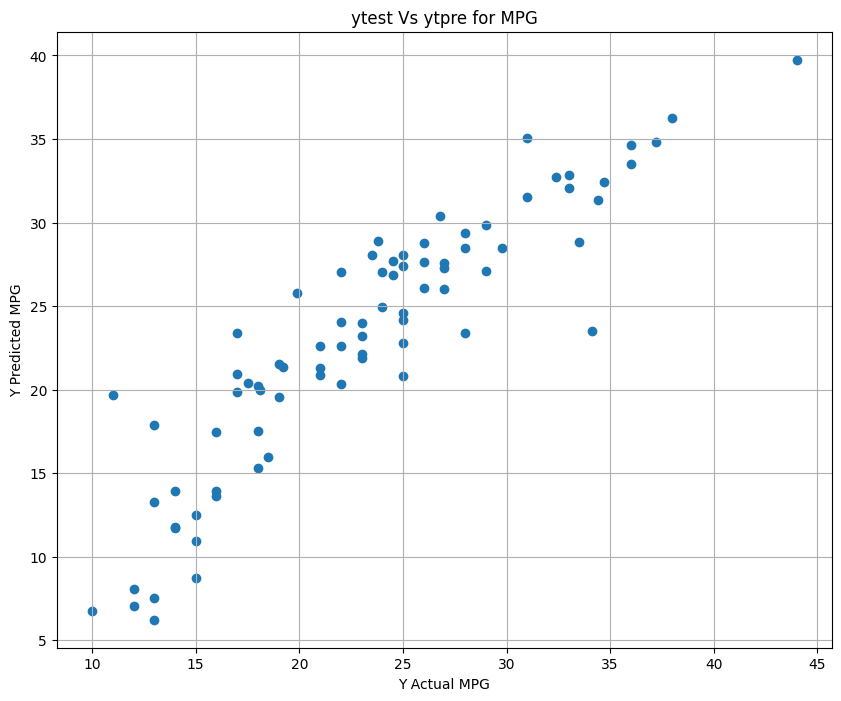

In [66]:
# plot the ytpre & yt
plt.figure(figsize=(10, 8))
plt.scatter(ytest, y_pred)
plt.title("ytest Vs ytpre for MPG")
plt.xlabel("Y Actual MPG")
plt.ylabel("Y Predicted MPG")
plt.grid()
plt.show()

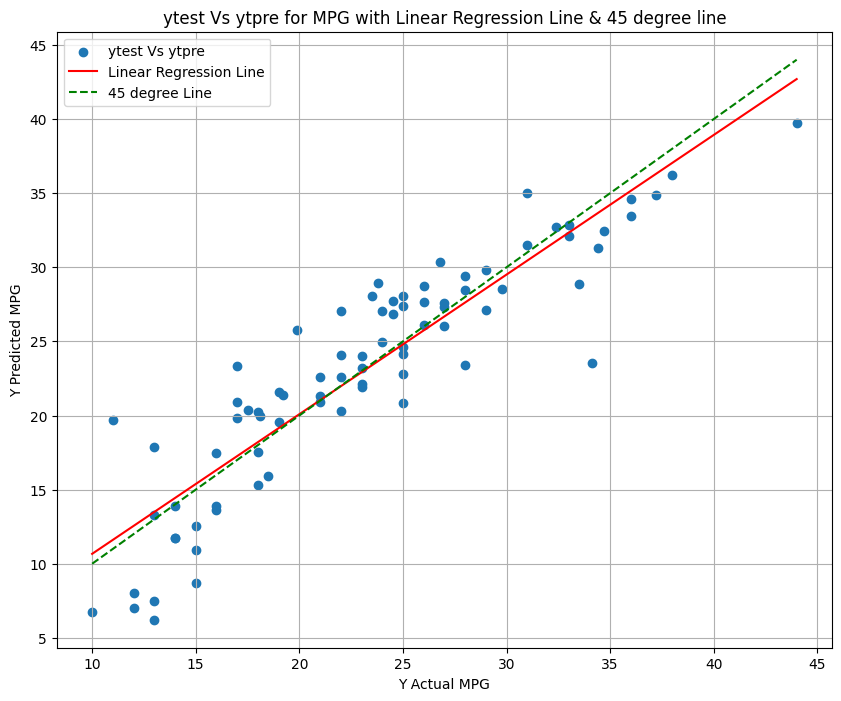

In [67]:
x_range = np.linspace(min(ytest), max(ytest), 100)
# a linear regression line
coefficients = np.polyfit(ytest, y_pred, 1)
linear_reg_line = np.poly1d(coefficients)
y_range = linear_reg_line(x_range)

# Create a scatter plot of the data points
plt.figure(figsize=(10, 8))
plt.scatter(ytest, y_pred, label='ytest Vs ytpre')
plt.plot(x_range, y_range, color='red', label='Linear Regression Line')
plt.plot(x_range, x_range, color='green', linestyle='dashed', label='45 degree Line')

plt.title("ytest Vs ytpre for MPG with Linear Regression Line & 45 degree line")
plt.xlabel("Y Actual MPG")
plt.ylabel("Y Predicted MPG")
plt.grid()
plt.legend()
plt.show()

**If we compare this figure with previous figure that has "linear regression line & 45 degree line",**

**we see that the distance and difference between our linear regression line and 45 degree line is more than this value in previous figure, which is not suitable and desirable for us.**

**for example in x-axes if we focus in range [10, 15] in two figures, we can see this differences.**

#### corr

In [71]:
eliminated_df_features = df.drop(['Cylinders', 'Displacement'], axis=1)
corr_matrix = eliminated_df_features.corr()
corr_matrix

,MPG,Horsepower,Weight,Acceleration,Model Year,Origin,Car_amc,Car_audi,Car_bmw,Car_buick,...,Car_renault,Car_saab,Car_subaru,Car_toyota,Car_toyouta,Car_triumph,Car_vokswagen,Car_volkswagen,Car_volvo,Car_vw
MPG,1.000000,-0.771785,-0.831741,0.420289,0.579267,0.563450,-0.185651,0.054845,0.002143,-0.117229,...,0.135325,0.004975,0.090488,0.161096,-0.003308,0.073844,0.040411,0.141770,-0.038004,0.245689
Horsepower,-0.771785,1.000000,0.860908,-0.684646,-0.411981,-0.453477,0.070925,-0.062186,0.013140,0.176986,...,-0.062937,0.011368,-0.081727,-0.142541,-0.009795,-0.021634,-0.055837,-0.201500,-0.000905,-0.141426
Weight,-0.831741,0.860908,1.000000,-0.417457,-0.306564,-0.581024,0.100900,-0.065539,-0.046502,0.145587,...,-0.119522,-0.041121,-0.098155,-0.204860,-0.027559,-0.027915,-0.066783,-0.217597,0.009105,-0.128396
Acceleration,0.420289,-0.684646,-0.417457,1.000000,0.288137,0.205873,-0.030344,0.018206,-0.075295,-0.066578,...,0.058642,-0.014381,0.049640,0.049998,-0.019463,-0.008530,-0.004885,0.101450,-0.000064,0.145924
Model Year,0.579267,-0.411981,-0.306564,0.288137,1.000000,0.180662,-0.128447,-0.010716,-0.048303,0.006154,...,0.036345,-0.054842,0.054293,0.035749,-0.054498,0.054224,0.054224,-0.032692,-0.005920,0.116916
Origin,0.563450,-0.453477,-0.581024,0.205873,0.180662,1.000000,-0.196731,0.071346,0.037894,-0.151062,...,0.060145,0.053727,0.179510,0.461236,0.089415,0.026762,0.026762,0.105525,0.065969,0.065969
Car_amc,-0.185651,0.070925,0.100900,-0.030344,-0.128447,-0.196731,1.000000,-0.036808,-0.019550,-0.058109,...,-0.031029,-0.027718,-0.027718,-0.071219,-0.013806,-0.013806,-0.013806,-0.054441,-0.034034,-0.034034
Car_audi,0.054845,-0.062186,-0.065539,0.018206,-0.010716,0.071346,-0.036808,1.000000,-0.009509,-0.028263,...,-0.015092,-0.013482,-0.013482,-0.034640,-0.006715,-0.006715,-0.006715,-0.026479,-0.016554,-0.016554
Car_bmw,0.002143,0.013140,-0.046502,-0.075295,-0.048303,0.037894,-0.019550,-0.009509,1.000000,-0.015012,...,-0.008016,-0.007161,-0.007161,-0.018399,-0.003567,-0.003567,-0.003567,-0.014064,-0.008792,-0.008792
Car_buick,-0.117229,0.176986,0.145587,-0.066578,0.006154,-0.151062,-0.058109,-0.028263,-0.015012,1.000000,...,-0.023826,-0.021284,-0.021284,-0.054686,-0.010601,-0.010601,-0.010601,-0.041803,-0.026133,-0.026133


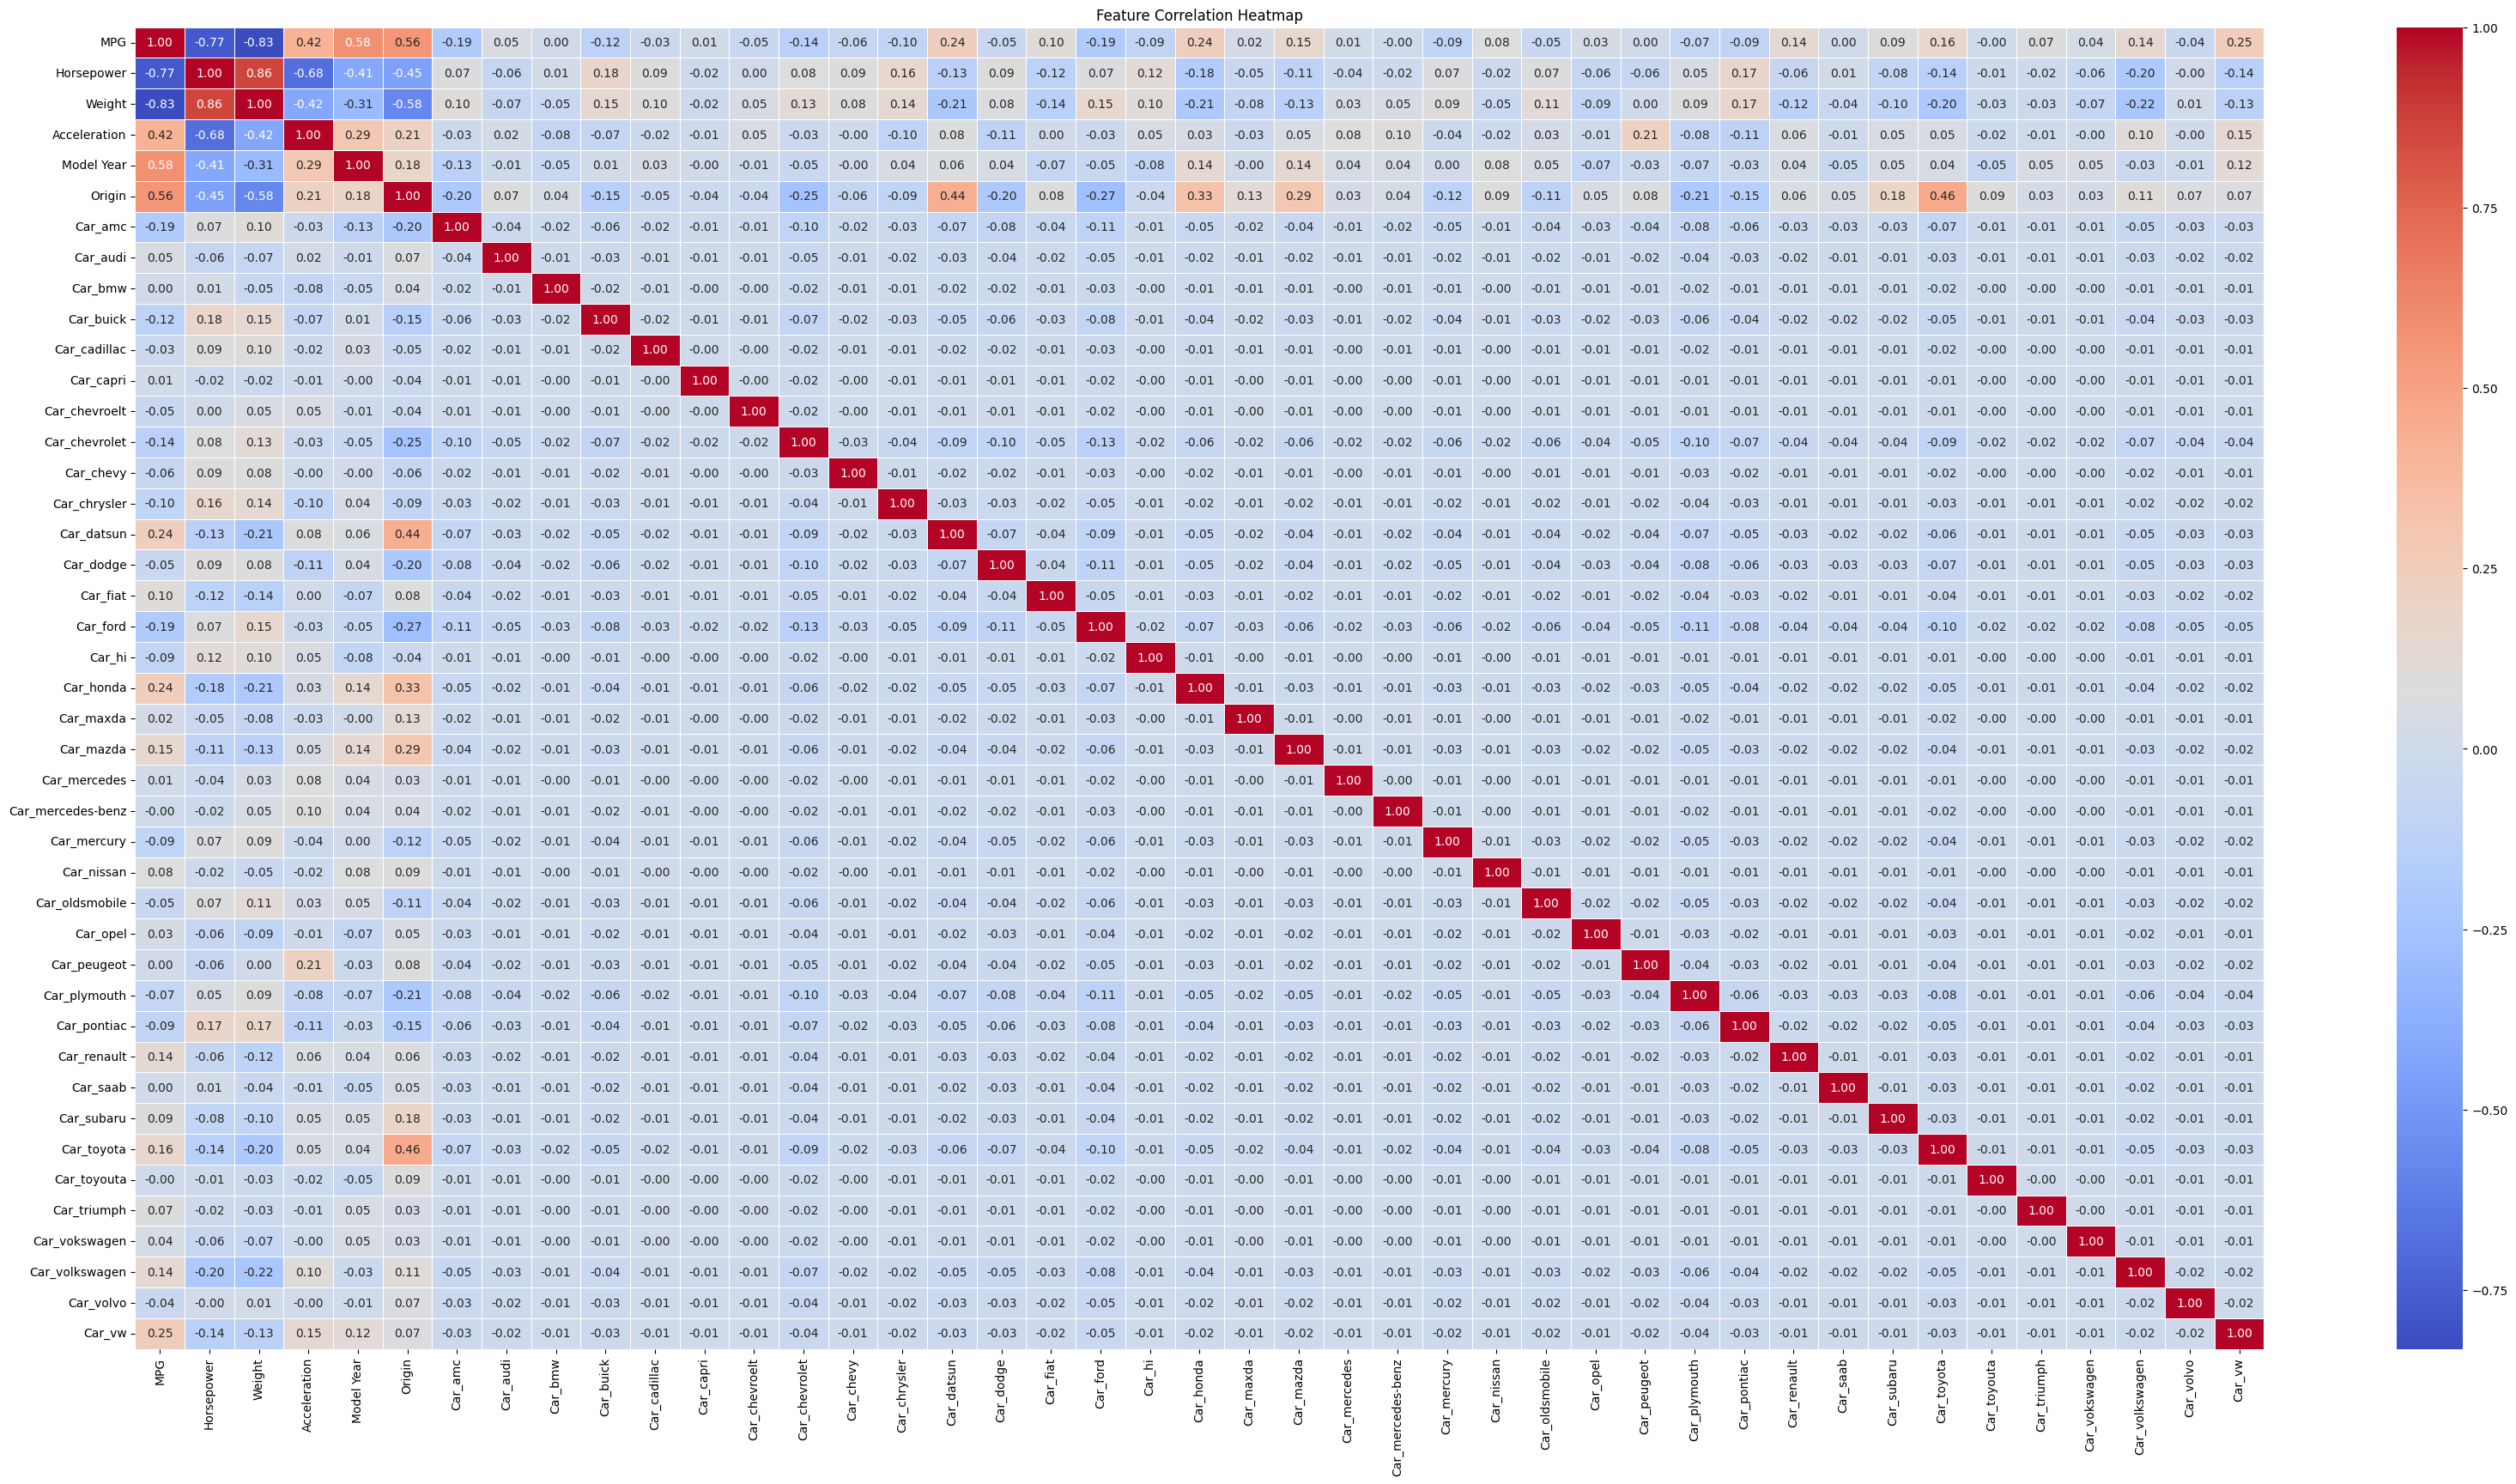

In [74]:
plt.figure(figsize=(40, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**In this section, we also observe that there is relatively low correlation between the features compared to previous model, and the highest positive correlation value is 0.86, which exists between features Weight and Horsepower.**

### **So As observed and explained, by eliminating features with the highest correlation, the MSE value increases, and we deviate from the desired and expected outcome for our linear regression model.**